# Problem Set 4, due February 23 at 11:59am, mid-day, noon.

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions.
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 3.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [3]:
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.keys()
# print bdata.feature_names
# print bdata.data.shape
# print bdata.target.shape
# print bdata.DESCR

# Create a data frame
boston_df = pd.DataFrame(bdata.data)

# Column names
boston_df.columns = bdata.feature_names

# Median price as target
boston_df['MEDV'] = bdata.target

# Display data
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# fitting linear model with RM
lmod1 = smf.ols(formula='MEDV ~ RM', data = boston_df).fit()
# Print results of the linear model
lmod1.params

Intercept   -34.670621
RM            9.102109
dtype: float64

In [5]:
# Creating new variable for square of RM
boston_df["RM2"] = boston_df["RM"]**2

#fitting second linear model
lmod2 = smf.ols(formula='MEDV ~ RM + RM2', data = boston_df).fit()

#printing
lmod2.params

Intercept    66.058847
RM          -22.643262
RM2           2.470124
dtype: float64

Observation:
From first linear regression model with only number of rooms (RM), we see a linear relationship between median price of houses and number of rooms, which means for every 1 bedroom increase the house price increases by $9.1k. In second linear regression model when we add the square of number of rooms covariate, then the coefficient of number of rooms reduces and the square term has a significant impact on the median prices of houses. Hence, we can infer that there is also a non-linear relationship in the model

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 250 slope coefficients using a histogram with 25 bins, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

In [6]:
from sklearn.cross_validation import KFold

# Making k-folds of  dataset
kf = KFold(506, n_folds=250)
print(kf)

# Defining the covariate and target
a = boston_df["RM"]
b = boston_df["MEDV"]

#creating test and train datasets
a_train = []
a_test = []
b_train = []
b_test = []

# Creating and combining 250 train data sets and 250 test datasets together
for train_index, test_index in kf:
    a_train.append(a[train_index])
    b_train.append(b[train_index])
    a_test.append(a[test_index])
    b_test.append(b[test_index])
    
#Creating matrix of RM and MEDV with K-fold generating two sets of train and test
#For first 5 iterations there are 503 indices in train and 3 indices in test
#and till 250 there are 504 indices in train and 2 incidences in test, so initiating a for loop for train and test datasets
for i in range(250):
    if i < 6:
        a_train[i] = a_train[i].reshape(503,1)
        b_train[i] = b_train[i].reshape(503,1)
        a_test[i] = a_test[i].reshape(3,1)
        b_test[i] = b_test[i].reshape(3,1)
    else:
        a_train[i] = a_train[i].reshape(504,1)
        b_train[i] = b_train[i].reshape(504,1)
        a_test[i] = a_test[i].reshape(2,1)
        b_test[i] = b_test[i].reshape(2,1)
        

sklearn.cross_validation.KFold(n=506, n_folds=250, shuffle=False, random_state=None)


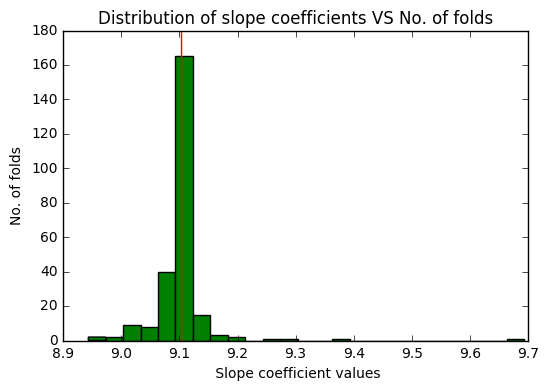

In [8]:
#Apply linear regression with MEDV as target and RM as predictor on 250 folds
linear_regression = []
for i in range(250):
    lin_reg = LinearRegression()
    linear_regression.append(lin_reg.fit(a_train[i], b_train[i]).coef_[0][0])
    
#now plotting histogram for the slope distribution    
plt.hist(linear_regression, bins = 25, color="g")
plt.axvline(x = lmod1.params[1],color = "r")
plt.xlabel(" Slope coefficient values")
plt.ylabel("No. of folds")
plt.title("Distribution of slope coefficients VS No. of folds")

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

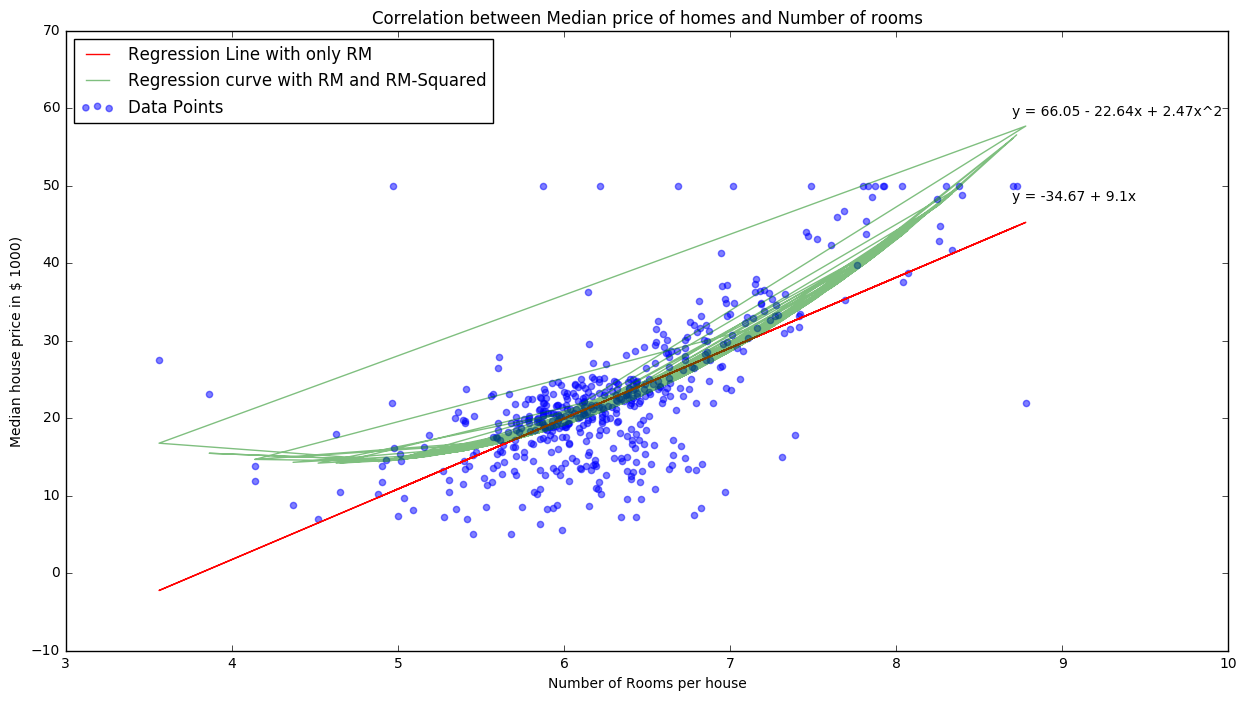

In [9]:
# creating a Scatter plot
fig, ax = plt.subplots(figsize=(15, 8))
#ax.grid(True)
ax.text(8.7, 48, "y = -34.67 + 9.1x")
ax.text(8.7, 59, "y = 66.05 - 22.64x + 2.47x^2")
ax.scatter(boston_df["RM"], boston_df["MEDV"], alpha=0.5, color='b', label ="Data Points")
#Adding a linear regression line within the plot
ax.plot(boston_df["RM"], lmod1.params[0] + (lmod1.params[1]*boston_df["RM"]), alpha=5, 
        color='r', label = "Regression Line with only RM")

#next adding a quadratic regression line
ax.plot(boston_df["RM"], 
           lmod2.params[0] + (lmod2.params[1]*boston_df["RM"]) + (lmod2.params[2]*((boston_df["RM"])**2)), 
           alpha=0.5,  color='g', label = "Regression curve with RM and RM-Squared")
plt.ylabel("Median house price in $ 1000)")
plt.xlabel("Number of Rooms per house")
plt.legend(loc="upper left")
plt.title("Correlation between Median price of homes and Number of rooms")
plt.show()

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [18]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
import time

def bivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=10000):
    start_time = time.time()
    x = xvalue_matrix
    #Calculating  length of target vector
    m = len(yvalues)
    #calculating  length of the output variable
    n = len(x.T)
    
    #starting off coefficients vector with all 10 values
    coeff = np.array([10]*l2)
    #Converting it to a matrix
    coeff = coeff.reshape(-1,1)
    
    #transposing the matrix of predictors
    xTrans = x.transpose()
    
    #Transferring the target vector to a matrix
    y = yvalues.values.reshape(-1,1)
    #the product of predictors and coefficient matrix giving the predicted values
    yhat = np.dot(x,coeff)
    #Calculate error
    err = yhat - y
    
    #finding sum of squared error from the above error matrix 
    err2 = np.sum(err**2)
    
    #setting converged to False 
    converged=False
    iteration=0
    while not converged:
        #Calculating the gradient
        gradient = np.dot(xTrans,err)/m
        
        #finding new coefficient values with learning rate and gradient
        coeff = coeff - R*gradient
        #Update cost value with new coefficient values
        yhat = np.dot(x,coeff)
        err=yhat-y
        cost = np.sum(err**2)
        
        #Checking if the convergence condition is met
        if(abs(cost-err2)<=0.0001):
            print("Converged after iteration: %s"%iteration)
            converged = True
        else:
            err2=cost
        #setting condition for maximum number of iterations        
        if iteration==MaxIterations:
            print("Max Iterations Reached")
            converged = True
        iteration+=1
    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
        
    return coeff[0], coeff[1]

In [16]:
#making a matrix with first col as intercept and next 2 columns as coefficient
x_matrix = np.ones((506, 2))
#Standardizing the vatiable RM
x_matrix[:,1:2] = boston_df["RM"].values.reshape(506,1)

print("\n For R = 0.1")
print(bivariate_ols(x_matrix, boston_df["MEDV"], 0.1, 1000000))

print("\n For R = 0.01")
print(bivariate_ols(x_matrix, boston_df["MEDV"], 0.01, 1000000))

print("\n For R = 0.001")
print(bivariate_ols(x_matrix, boston_df["MEDV"], 0.001, 1000000))


 For R = 0.1
Max Iterations Reached
Time taken: 29.5 seconds
(array([ nan]), array([ nan]))

 For R = 0.01
Converged after iteration: 42626
Time taken: 1.13 seconds
(array([-34.41238327]), array([ 9.06151274]))

 For R = 0.001
Converged after iteration: 330531
Time taken: 9.88 seconds
(array([-33.85391358]), array([ 8.97371847]))


Observation:
The value of alpha and coefficient for the bivariate model is pretty similar to what we got with the OLS function we got.
As with large values of R, error function becomes infite, so the learning rate of 0.1 is giving undefined output.
We find the best alpha and coefficient is for the learning rate 0.01.

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [17]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [19]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""
import time
def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=10000):
    start_time = time.time()
    x = xvalue_matrix
    #Calculating length of target vector
    m = len(yvalues)
    #calculating length of the output variable
    n = len(x.T)
    
    #starting off coefficients vector with all 10 values
    coeff = np.array([10]*n)
    #Convert to matrix
    coeff = coeff.reshape(-1,1)
    
    #transposing the matrix of predictors
    xTrans = x.transpose()
    
    #Converting vector of traget to a matrix
    y = yvalues.values.reshape(-1,1)
    #the product of predictors and coefficient matrix gives the predicted values
    yhat = np.dot(x,coeff)
    #Calculating error
    err = yhat - y
    
    #finding sum of squared error from the above error matrix
    err2 = np.sum(err**2)
    
    #setting converged to False as deafult
    converged=False
    iteration=0
    while not converged:
        #Calculating gradient
        gradient = np.dot(xTrans,err)/m
        
        #Calculating new coefficient values with learning rate and gradient
        coeff = coeff - R*gradient
        #Updating cost value with new coefficient values
        yhat = np.dot(x,coeff)
        err=yhat-y
        cost = np.sum(err**2)
        
        #Checking if the convergence condition is reached
        if(abs(cost-err2)<=0.0001):
            print("Converged after iteration: %s"%iteration)
            converged = True
        else:
            err2=cost
        #condition for max number of iterations        
        if iteration==MaxIterations:
            print("Max Iterations Reached")
            converged = True
        iteration+=1
    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
        
    return coeff[0], coeff[1:]

In [22]:
#Creating a matrix with first col for intercept and next 2 columns for beta_1 and beta_2
x_matrix = np.ones((506, 3))
#Standardizing RM and CRIM
x_matrix[:,1:2] = standardize(boston_df["RM"]).values.reshape(506,1)
x_matrix[:,2:3] = standardize(boston_df["CRIM"]).values.reshape(506,1)

print("\n For R = 0.1")
print(multivariate_ols(x_matrix, boston_df["MEDV"], 0.1, 10000))

print("\n For R = 0.01")
print(multivariate_ols(x_matrix, boston_df["MEDV"], 0.01, 10000))

print("\n For R = 0.001")
print(multivariate_ols(x_matrix, boston_df["MEDV"], 0.001, 10000))


 For R = 0.1
Converged after iteration: 113
Time taken: 0.01 seconds
(array([ 22.53273017]), array([[ 5.89519421],
       [-2.24782868]]))

 For R = 0.01
Converged after iteration: 1018
Time taken: 0.05 seconds
(array([ 22.53235932]), array([[ 5.89720009],
       [-2.24579562]]))

 For R = 0.001
Converged after iteration: 8754
Time taken: 0.44 seconds
(array([ 22.5308389]), array([[ 5.90314339],
       [-2.23969647]]))


Observation:
In the above multivariate regression we are standardizing the covariates and we are taking learning rate as 0.1 and upto 113 iterations.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [23]:
#Now without standradizing RM and CRIM as done before
x_matrix = np.ones((506, 3))
x_matrix[:,1:2] = boston_df["RM"].values.reshape(506,1)
x_matrix[:,2:3] = boston_df["CRIM"].values.reshape(506,1)

print("\n For R = 0.1")
print(multivariate_ols(x_matrix, boston_df["MEDV"], 0.1, 100000))

print("\n For R = 0.01")
print(multivariate_ols(x_matrix, boston_df["MEDV"], 0.01, 100000))

print("\n For R = 0.001")
print(multivariate_ols(x_matrix, boston_df["MEDV"], 0.001, 100000))


 For R = 0.1
Max Iterations Reached
Time taken: 2.28 seconds
(array([ nan]), array([[ nan],
       [ nan]]))

 For R = 0.01
Converged after iteration: 43941
Time taken: 1.06 seconds
(array([-29.02447588]), array([[ 8.35444689],
       [-0.26274883]]))

 For R = 0.001
Max Iterations Reached
Time taken: 2.69 seconds
(array([-16.87529333]), array([[ 6.46615335],
       [-0.30333011]]))


Observatiom:
Here, we are not standardizing the data and we see that for learning rate 0.1 we are getting alpha and coefficients as undefined.
So, we can infer that multivariate regression works best when the data is standardized already.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, it would be wise for you to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

In [24]:
from sklearn.cross_validation import train_test_split

#creating a  matrix
x_matrix = np.ones((506,3))
x_matrix[:,1:2] = standardize(boston_df["RM"]).values.reshape(506,1)
x_matrix[:,2:3] = standardize(boston_df["CRIM"]).values.reshape(506,1)
y = boston_df["MEDV"]

#Divide the dataset into train and test
a_train, a_test, b_train, b_test = train_test_split(x_matrix,y,test_size=0.34,random_state=10)

model_3 = multivariate_ols(a_train,b_train,0.01,1000)
print(model_3)

Converged after iteration: 979
Time taken: 0.04 seconds
(array([ 22.2902383]), array([[ 5.78672565],
       [-2.51469524]]))


Observation:
After dividing the data set into train and test, we see that the model gives same results as the model in question 2.3

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [26]:
#Repeating the use of RMSE function from part 3
def compute_rmse(prediction,yvalues):
    if len(np.array(prediction))==len(np.array(yvalues)):
        rmse = np.sqrt(np.mean((np.array(prediction)-np.array(yvalues))**2))
    else:
        print("array length not equal")
        return -1
    return rmse 


# next creating an array for predicted values
yhat = []

alpha = model_3[0]
beta_0 = model_3[1][0]
beta_1 = model_3[1][1]
for i in range(len(a_test)):
   
    yhat.append((alpha+beta_0*a_test[i][1]+beta_1*a_test[i][2])[0])

y_actual = []
#initiating a loop below
for i in b_test.index:
    y_actual.append(b_test[i])

print("RMSE obtained for the test data:\n")    
print(compute_rmse(yhat,y_actual))

RMSE obtained for the test data:

6.20195117278


Observation:
In problem set 3, we see that the nearest neighbor gave an average RMSE of 6.77 (which is within the range 5 and 12)
And in the above question 3.2, we are see that RMSE is 6.2. This indicates that gradient descent provides better preformance than nearest neighbor method.

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [ ]:
# Your code here

*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have *K+K^2/2* features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [28]:
# resetting data into a pandas DataFrame
new_boston_df = pd.DataFrame(bdata.data)

# Naming columns
new_boston_df.columns = bdata.feature_names

#creating a list for new features
features = bdata.feature_names

#creating new features    
for i in range(len(features)):
    f1 = features[i]   
    j = i+1
    for j in range(j,len(features)):
        f2 = features[j]
        new_boston_df[f1+"*"+f2]=new_boston_df[f1]*new_boston_df[f2]
                
# Set price column for target
new_boston_df['MEDV'] = bdata.target

### 4.2 Let's overfit!
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those *K+K/2* features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [31]:
x_matrix = np.ones((506, 11, ))

x_matrix[:,1:2] = standardize(new_boston_df["RM"]).reshape(506,1)
x_matrix[:,2:3] = standardize(new_boston_df["CRIM"]).reshape(506,1)
x_matrix[:,3:4] = standardize(new_boston_df["DIS"]).reshape(506,1)
x_matrix[:,4:5] = standardize(new_boston_df["RAD"]).reshape(506,1)
x_matrix[:,5:6] = standardize(new_boston_df["TAX"]).reshape(506,1)
x_matrix[:,6:7] = standardize(new_boston_df["CRIM*RM"]).reshape(506,1)
x_matrix[:,7:8] = standardize(new_boston_df["CRIM*DIS"]).reshape(506,1)
x_matrix[:,8:9] = standardize(new_boston_df["DIS*RAD"]).reshape(506,1)
x_matrix[:,9:10] = standardize(new_boston_df["RAD*TAX"]).reshape(506,1)
x_matrix[:,10:11] = standardize(new_boston_df["RM*TAX"]).reshape(506,1)

y = new_boston_df["MEDV"]

#splitting into test and train
a_train, a_test, b_train, b_test = train_test_split(x_matrix, y, test_size=0.34, random_state = 5)



#fitting the model
model_4 = multivariate_ols(a_train, b_train, 0.01, 100000)
#printing the coeffs
model_4

Max Iterations Reached
Time taken: 2.67 seconds


(array([ 22.47101579]), array([[ 12.22239516],
        [  1.804958  ],
        [ -1.17338703],
        [ -1.64857489],
        [ 21.98835125],
        [  0.16254483],
        [ -4.12729447],
        [  1.61835664],
        [  0.38334296],
        [-23.14222626]]))

In [32]:
#Storing predicted values in a list
y_testset = []
for i in range(len(a_test)):
    y_testset.append((model_4[0] 
                       + model_4[1][0]*a_test[i][0] 
                       + model_4[1][1]*a_test[i][1]
                       + model_4[1][2]*a_test[i][2]
                       + model_4[1][3]*a_test[i][3]
                       + model_4[1][4]*a_test[i][4]
                       + model_4[1][5]*a_test[i][5]
                       + model_4[1][6]*a_test[i][6]
                       + model_4[1][7]*a_test[i][7]
                       + model_4[1][8]*a_test[i][8]
                       + model_4[1][9]*a_test[i][9])[0])
                         
#store the predicted values for the test set into a list    
y_trainset = []
for i in range(len(a_train)):
    y_trainset.append((model_4[0] 
                       + model_4[1][0]*a_train[i][0] 
                       + model_4[1][1]*a_train[i][1]
                       + model_4[1][2]*a_train[i][2]
                       + model_4[1][3]*a_train[i][3]
                       + model_4[1][4]*a_train[i][4]
                       + model_4[1][5]*a_train[i][5]
                       + model_4[1][6]*a_train[i][6]
                       + model_4[1][7]*a_train[i][7]
                       + model_4[1][8]*a_train[i][8]
                       + model_4[1][9]*a_train[i][9])[0])

#Computing train RMSE
compute_rmse(y_trainset, b_train)

14.141956438528057

In [33]:
#Computing test RMSE
compute_rmse(y_testset, b_test)

14.662275665281701

Observation:
We find from the above code that the RMSE value for train and test is same.
But, in comparison to test data, we are see that we have a higher RMSE for train data set which suggest correct behavior of the model.

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 3.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [34]:
# Your code here
import time
def ridge_multivariate_ols(xvalue_matrix, yvalues, R, L, MaxIterations):
    start_time = time.time()
    x = xvalue_matrix
    #Calculating length of target vector
    m = len(yvalues)
    #calculating length of the output variable
    n = len(x.T)
    
    #starting off coefficients vector with all 10 values
    coeff = np.array([10]*n)
    #Converting to a matrix
    coeff = coeff.reshape(-1,1)
    
    #transposing the matrix of predictors
    xTrans = x.transpose()
    
    #Converting the vector of traget to a matrix
    y = yvalues.values.reshape(-1,1)
    #the product of predictors and coefficient matrix gives the predicted values
    yhat = np.dot(x,coeff)
    #Calculating error
    err = yhat - y
    
    #finding sum of squared error(cost) from the error matrix obtained above
    err2 = np.sum(err**2)
    
    #setting converged to False as default
    converged=False
    iteration=0
    while not converged:
        #Calculating gradient
        gradient = np.dot(xTrans,err)/m
        
        #Calculating new coefficient values with learning rate and gradient
        coeff = coeff - R*(gradient+ (L/m)*coeff)
        #Updating cost value with new coefficient values
        yhat = np.dot(x,coeff)
        err=yhat-y
        cost = np.sum(err**2)
        
        #Check if we have reached the convergence condition
        if(abs(cost-err2)<=0.0001):
            print("Converged after iteration: %s"%iteration)
            converged = True
        else:
            err2=cost
        #condition for max number of iterations        
        if iteration==MaxIterations:
            print("Max Iterations Reached")
            converged = True
        iteration+=1
    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
        
    return coeff[0], coeff[1:]

In [35]:
x_matrix = np.ones((506, 11, ))

x_matrix[:,1:2] = standardize(new_boston_df["RM"]).reshape(506,1)
x_matrix[:,2:3] = standardize(new_boston_df["CRIM"]).reshape(506,1)
x_matrix[:,3:4] = standardize(new_boston_df["DIS"]).reshape(506,1)
x_matrix[:,4:5] = standardize(new_boston_df["RAD"]).reshape(506,1)
x_matrix[:,5:6] = standardize(new_boston_df["TAX"]).reshape(506,1)
x_matrix[:,6:7] = standardize(new_boston_df["CRIM*RM"]).reshape(506,1)
x_matrix[:,7:8] = standardize(new_boston_df["CRIM*DIS"]).reshape(506,1)
x_matrix[:,8:9] = standardize(new_boston_df["DIS*RAD"]).reshape(506,1)
x_matrix[:,9:10] = standardize(new_boston_df["RAD*TAX"]).reshape(506,1)
x_matrix[:,10:11] = standardize(new_boston_df["RM*TAX"]).reshape(506,1)

y = new_boston_df["MEDV"]

#splitting into test and train
a_train, a_test, b_train, b_test = train_test_split(x_matrix, y, test_size=0.34, random_state = 5)

In [38]:
L = [0.001,0.005,0.1,0.5,0.7,1,3,5,7,10,13,15,20]

for l in L:
    model_4 = ridge_multivariate_ols(a_train, b_train, 0.01, l, 1000000)

    y_pred = []
    for i in range(len(a_test)):
        y_pred.append((model_4[0] 
                       + model_4[1][0]*a_test[i][0] 
                       + model_4[1][1]*a_test[i][1]
                       + model_4[1][2]*a_test[i][2]
                       + model_4[1][3]*a_test[i][3]
                       + model_4[1][4]*a_test[i][4]
                       + model_4[1][5]*a_test[i][5]
                       + model_4[1][6]*a_test[i][6]
                       + model_4[1][7]*a_test[i][7]
                       + model_4[1][8]*a_test[i][8]
                       + model_4[1][9]*a_test[i][9])[0])
    y_actual = []
    for i in b_test.index:
        y_actual.append(b_test[i])
    
    print ("RMSE for L = %s"%l)
    print (compute_rmse(y_pred, y_actual))
    print ("\n")

Converged after iteration: 125898
Time taken: 3.0 seconds
RMSE for L = 0.001
15.0921331965


Converged after iteration: 126996
Time taken: 3.12 seconds
RMSE for L = 0.005
15.0690483398


Converged after iteration: 142558
Time taken: 3.38 seconds
RMSE for L = 0.1
14.4253674628


Converged after iteration: 122302
Time taken: 3.52 seconds
RMSE for L = 0.5
13.1407648854


Converged after iteration: 108731
Time taken: 3.25 seconds
RMSE for L = 0.7
12.972153656


Converged after iteration: 92452
Time taken: 3.5 seconds
RMSE for L = 1
12.8213605512


Converged after iteration: 47160
Time taken: 1.04 seconds
RMSE for L = 3
11.9299772298


Converged after iteration: 33131
Time taken: 1.06 seconds
RMSE for L = 5
11.3051715741


Converged after iteration: 25839
Time taken: 0.89 seconds
RMSE for L = 7
10.9214671671


Converged after iteration: 19438
Time taken: 1.07 seconds
RMSE for L = 10
10.5686795858


Converged after iteration: 15496
Time taken: 0.91 seconds
RMSE for L = 13
10.3411633872


Con

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

In [ ]:
# Your code here

*Discuss your results here*

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot

In [ ]:
# Your code here

*Discuss your results here*